In [1]:
import os,sys, h5py, pdb,time, glob
from importlib import reload
import pylab as pl, numpy as np
from numpy import log10 as log, log as ln
from astropy import units as un, constants as cons
import scipy, scipy.stats
from matplotlib import ticker, patches
from mpl_toolkits.mplot3d import Axes3D
sys.path.append('../../pysrc')

In [2]:
import workdirs as wd
import FIRE_files as ff
from FIRE_files import cosmo, u
from projectPlotBasics import *
import first_pass as l
cmap = pl.get_cmap('viridis')
figdir = wd.basedir+'figures/'

Behroozi+18 not loaded
palettable colormaps are not installed
don't have phil's colormaps


In [3]:
CF_path = '../../../cooling_flow/pysrc'
sys.path.append(CF_path)
import cooling_flow as CF, HaloPotential as Halo
import WiersmaCooling as Cool
%matplotlib inline

In [ ]:
simnames = ('vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking',
            #'vc200_Rs0_Mdot226_Rcirc1_fgas02_res1e4_vturb3',
            #'vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3',
            #'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4_vturb10',
            #'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4_vturb30',
            #'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4_vturb100',
            #'vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3',
            'vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3',
            ##'vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3',
            #'vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3',
            'vc200_Rs0_Mdot121_Rcirc10_fgas02_res1e3_vturb30', 
           )
pl.figure(figsize=(10,10)); pl.subplots_adjust(wspace=0.4)
axs = [pl.subplot(2,3,i+1) for i in range(5)]
for isim,simname in enumerate(simnames):
    c = pl.get_cmap('viridis')(isim/len(simnames))
    vc = float(simname.split('_')[0][2:]) * un.km/un.s 
    Rcirc = float(simname.split('_')[3][5:]) * un.kpc  
    simdir = '/mnt/home/jstern/Drummond_data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,200*un.kpc,origin=np.zeros(3),Rcirc = Rcirc,snapshot_dt_Myr=50,pr=False,
          analyticGravity= Halo.PowerLaw(m=0.,vc_Rvir=vc,Rvir=200*un.kpc))
    sim.z = 0 #for cooling function
    iSnapshot = sim.Nsnapshots()-1        
    snapshot = sim.getSnapshot(iSnapshot)
    prof = sim.getProfiler(iSnapshot)
    rs = prof.rs_midbins()
    v_r =   -prof.profile1D('vrs','MW',minT=3e5)  #km/s
    dts = prof.drs_midbins() / v_r 
    v_phi = prof.profile1D('v_phi','MW',minT=3e5) #km/s
    sigma_turb = prof.sigma_turb('MW')
    Omega = v_phi / rs
    rad = Omega*dts #dimensionless
    ind = np.searchsorted(rs,Rcirc)
    pl.sca(axs[0]); pl.loglog(prof.rs_midbins()[ind:], rad[ind:].cumsum(),lw=lw,c=c,label=simname)
    pl.sca(axs[1]); pl.loglog(rs,v_r,c=c,lw=lw)
    pl.sca(axs[2]); pl.loglog(rs,v_phi,c=c,lw=lw)
    pl.sca(axs[3]); pl.loglog(rs,sigma_turb,c=c,lw=lw)
    pl.sca(axs[4]); pl.loglog(rs, prof.profile1D('cs','MW') ,c=c,lw=lw)
    prof.tofile()   
    #pl.title(simname)
for iax,ax in enumerate(axs):
    pl.sca(ax)
    pl.ylabel((r'$\Omega t$',r'$v_r$',r'$v_\phi$',r'$\sigma_{\rm turb}$',r'$c_{\rm s}$')[iax],fontsize=16)
    pl.xlim(5,50)
    ax.xaxis.set_major_formatter(u.arilogformatter)
    ax.yaxis.set_major_formatter(u.arilogformatter)
    if iax==0: pl.legend()
    else: pl.ylim(5,300)
    pl.axvline(Rcirc.value,lw=0.5,c='.5')
    pl.xlabel(r'$r$ [kpc]',fontsize=14)
    #pl.ylim(0.1,400)
    #pl.savefig(figdir+'turb_analysis_Mdot%d.pdf'%Mdot)

/mnt/home/jstern/gizmo_analysis/ipynb/subsonic_solution/../../pysrc/FIRE_files.py:1011: RuntimeWarning: invalid value encountered in sqrt
  return (tmp.sum(axis=0)/3.)**0.5
/mnt/home/jstern/gizmo_analysis/ipynb/subsonic_solution/../../pysrc/FIRE_files.py:1011: RuntimeWarning: invalid value encountered in sqrt
  return (tmp.sum(axis=0)/3.)**0.5
/mnt/home/jstern/gizmo_analysis/ipynb/subsonic_solution/../../pysrc/FIRE_files.py:1010: RuntimeWarning: invalid value encountered in subtract
  tmp=np.array([self.profile1D('v%s'%d,weight,power=2) - self.profile1D('v%s'%d,weight)**2 for d in ('rs','_phi','_theta')])
/mnt/home/jstern/gizmo_analysis/ipynb/subsonic_solution/../../pysrc/FIRE_files.py:1011: RuntimeWarning: invalid value encountered in sqrt
  return (tmp.sum(axis=0)/3.)**0.5


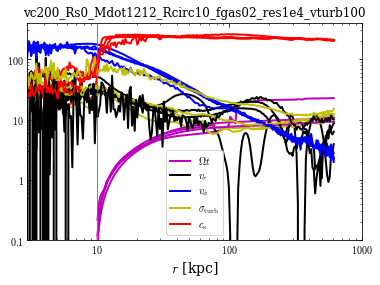

In [65]:
simnames = (#'vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking',
            #'vc200_Rs0_Mdot226_Rcirc1_fgas02_res1e4_vturb3',
            #'vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4_vturb10',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4_vturb30',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4_vturb100',
            #'vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3',
            #'vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3',
            #'vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3',
            ##'vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3',
            #'vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3',
            #'vc200_Rs0_Mdot121_Rcirc10_fgas02_res1e3_vturb30',            
           )
for isim,simname in enumerate(simnames):
    vc = float(simname.split('_')[0][2:]) * un.km/un.s 
    Rcirc = float(simname.split('_')[3][5:]) * un.kpc
    #pl.figure()
    ax = pl.subplot(111)
    pl.subplots_adjust(wspace=0.4)
    simdir = '/mnt/home/jstern/Drummond_data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,200*un.kpc,origin=np.zeros(3),Rcirc = Rcirc,snapshot_dt_Myr=50,pr=False,
          analyticGravity= Halo.PowerLaw(m=0.,vc_Rvir=vc,Rvir=200*un.kpc))
    sim.z = 0 #for cooling function
    iSnapshot = sim.Nsnapshots()-1        
    snapshot = sim.getSnapshot(iSnapshot)
    prof = sim.getProfiler(iSnapshot)
    rs = prof.rs_midbins()
    v_r =   -prof.profile1D('vrs','MW',minT=3e5)  #km/s
    dts = prof.drs_midbins() / v_r 
    v_phi = prof.profile1D('v_phi','MW',minT=3e5) #km/s
    sigma_turb = prof.sigma_turb('MW')
    Omega = v_phi / rs
    rad = Omega*dts #dimensionless
    ind = np.searchsorted(rs,Rcirc)
    pl.semilogx(prof.rs_midbins()[ind:], rad[ind:].cumsum(),lw=lw,c='m',label=r'$\Omega t$')
    pl.loglog(rs,v_r,c='k',lw=lw,label=r'$v_r$')
    pl.loglog(rs,v_phi,c='b',lw=lw,label=r'$v_\phi$')
    pl.loglog(rs,sigma_turb,c='y',lw=lw,label=r'$\sigma_{\rm turb}$')
    pl.loglog(rs, prof.profile1D('cs','MW') ,c='r',lw=lw,label=r'$c_{\rm s}$')
    prof.tofile()   
    pl.title(simname)
    pl.xlim(3,1000)
    ax.xaxis.set_major_formatter(u.arilogformatter)
    ax.yaxis.set_major_formatter(u.arilogformatter)
    if isim==0: pl.legend()
    pl.axvline(Rcirc.value,lw=0.5,c='.5')
    pl.xlabel(r'$r$ [kpc]',fontsize=14)
    pl.ylim(0.1,400)
    #pl.savefig(figdir+'turb_analysis_Mdot%d.pdf'%Mdot)

In [6]:
def smooth(arr,kernel_size = 30):
    kernel = np.ones(kernel_size) / kernel_size
    return np.convolve(arr, kernel, mode='same')


In [5]:
#grep "(r3d>10)" */gizmo/init.c > ~/ceph/sim_analysis/metallicities.txt
Cool.dataDir = '/mnt/home/jstern/cooling_flow/cooling/Wiersma09_CoolingTables/'
fn = '/mnt/home/jstern/ceph/sim_analysis/metallicities.txt'
Zdic = {}; LambdaDic = {}
f = open(fn)
for line in f.readlines():
    simname = line.split('/')[0]
    Zdic[simname]      = float(line.split('*')[-1].split(';')[0])
    LambdaDic[simname] = Cool.Wiersma_Cooling(Zdic[simname],0).LAMBDA(2e6*un.K,0.1*un.cm**-3)
tratio = lambda r,vc,Mdot,Lambda: (20**0.5/3 * 0.13 * (r/10)**-0.5 * (vc/200)**-2*Mdot**0.5*(Lambda/1e-22)**0.5)**-1

/mnt/home/jstern/gizmo_analysis/ipynb/subsonic_solution/../../../cooling_flow/pysrc/WiersmaCooling.py:53: RuntimeWarning: invalid value encountered in log10
  vals = log(self.LAMBDA(X*un.K,Y*un.cm**-3).value)


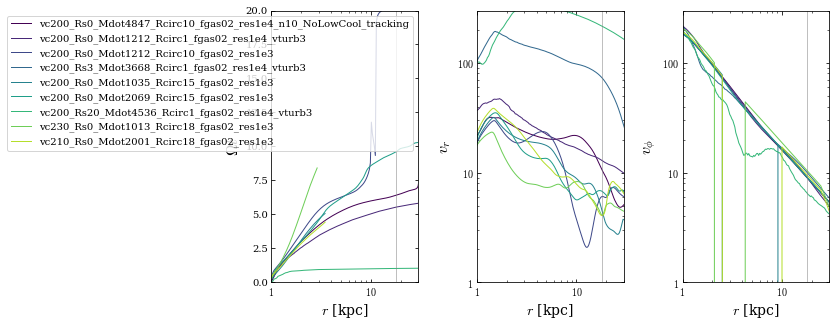

In [33]:
simnames = ('vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking',
            'vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3',
            'vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3',
            'vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3',
            'vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3',
            'vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3',
            'vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3'
            #'vc200_Rs0_Mdot121_Rcirc10_fgas02_res1e3_vturb30', 
           )
total_rot, t_ratios = [np.zeros(len(simnames)) for i in range(2)]
pl.figure(figsize=(10,5)); pl.subplots_adjust(wspace=0.4)
axs = [pl.subplot(1,3,i+1) for i in range(3)]
for isim,simname in enumerate(simnames):
    c = pl.get_cmap('viridis')(isim/len(simnames))
    lw = 1
    vc = float(simname.split('_')[0][2:]) * un.km/un.s 
    Rcirc = float(simname.split('_')[3][5:]) * un.kpc  
    Mdot = float(simname.split('_')[2][4:]) /1000 * un.Msun/un.yr
    Rvir = 200*un.kpc
    simdir = '/mnt/home/jstern/Drummond_data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,Rvir,origin=np.zeros(3),Rcirc = Rcirc,snapshot_dt_Myr=50,pr=False,
          analyticGravity= Halo.PowerLaw(m=0.,vc_Rvir=vc,Rvir=Rvir))
    sim.z = 0 #for cooling function
    iSnapshot = sim.Nsnapshots()-1        
    snapshot = sim.getSnapshot(iSnapshot)
    prof = sim.getProfiler(iSnapshot)
    rs = prof.rs_midbins()
    v_r =   -prof.profile1D_multiple(['vrs'],'MW')[0]  #km/s
    dts = prof.drs_midbins() / v_r 
    v_phi = prof.profile1D_multiple(['v_phi'],'MW')[0] #km/s
    Omega = v_phi / rs
    rad = Omega*dts #dimensionless    
    ind = np.searchsorted(rs,Rcirc.value)
    rot = rad[ind:].cumsum()
    pl.sca(axs[0]); pl.semilogx(rs[ind:]/Rcirc, rot,lw=lw,c=c,label=simname)
    pl.sca(axs[1]); pl.loglog(rs/Rcirc,smooth(v_r),c=c,lw=lw)
    pl.sca(axs[2]); pl.loglog(rs/Rcirc,smooth(v_phi),c=c,lw=lw)
    ind2 = np.searchsorted(rs[ind:]/Rcirc.value,10)
    total_rot[isim] = rot[ind2]
    #t_ratios[isim] = prof.atRcirc(prof.t_cool()/prof.t_ff())
    t_ratios[isim] = tratio(Rcirc.value,vc.value,Mdot.value,
                            LambdaDic[simname].value)
    prof.tofile()   
    
    #pl.title(simname)
for iax,ax in enumerate(axs):
    pl.sca(ax)
    pl.ylabel((r'$\Omega t$',r'$v_r$',r'$v_\phi$',r'$\sigma_{\rm turb}$',r'$c_{\rm s}$')[iax],fontsize=16)
    pl.xlim(1,30)
    ax.xaxis.set_major_formatter(u.arilogformatter)
    
    if iax==0: 
        pl.legend()
        pl.ylim(0,20)
    else: 
        pl.ylim(1,300)
        ax.yaxis.set_major_formatter(u.arilogformatter)
    pl.axvline(Rcirc.value,lw=0.5,c='.5')
    pl.xlabel(r'$r$ [kpc]',fontsize=14)
    #pl.ylim(0.1,400)
    #pl.savefig(figdir+'turb_analysis_Mdot%d.pdf'%Mdot)

/tmp/ipykernel_2330361/1951507945.py:4: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  pl.ylim(0,15)


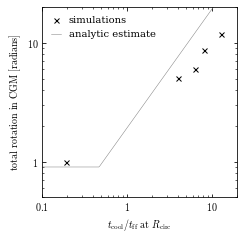

In [37]:
fig = pl.figure(figsize=(3.5,3.5))
ax = pl.subplot(111)
pl.loglog(t_ratios, total_rot,'x',c='k',ms=5,label='simulations')
pl.ylim(0,15)
ax.xaxis.set_major_formatter(u.arilogformatter)
ax.yaxis.set_major_formatter(u.arilogformatter)
pl.xlabel(r'$t_{\rm cool} / t_{\rm ff}\ {\rm at}\ R_{\rm circ}$')
pl.ylabel(r'${\rm total\ rotation\ in\ CGM}\ [{\rm radians}]$')
pl.xlim(0.1,20)
pl.ylim(0.5,20)
_xs = np.arange(0.1,20,0.01)
pl.plot(_xs,ff.u.maxarray(1.9*_xs,0.9),c='.5',ls='-',lw=0.5,label='analytic estimate')
pl.legend(loc='upper left',frameon=False,handlelength=1)
pl.savefig(figdir+'total_rotation.pdf')

### check Z, and then derive tcool/tff